In [1]:
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch
import torchvision
print("imported libs")

imported libs


In [3]:
batch_size = 5

def get_data():
    data_dir = 'data'
   
    transform = transforms.Compose([
    transforms.Grayscale(),
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])


    train_set = datasets.ImageFolder(data_dir + '/train', transform=transform)
    test_set = datasets.ImageFolder(data_dir + '/test', transform=transform)

    train = DataLoader(train_set, batch_size=batch_size, shuffle=True)
    test = DataLoader(test_set, batch_size=batch_size, shuffle=True)

    return train, test

print("Get data done")

Get data done


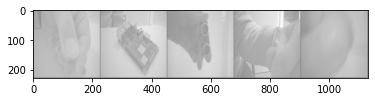

led   raspberry ultrasonic led   led  


In [4]:
import matplotlib.pyplot as plt
import numpy as np
train, test = get_data()

classes = ('button', 'led', 'raspberry', 'ultrasonic')
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(train)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [8]:
class CNN(nn.Module):
    
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 53 * 53, 1024)
        self.fc2 = nn.Linear(1024, 512)
        self.fc3 = nn.Linear(512, 4)
        
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 53 * 53)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [10]:
# Train with GPU
device = torch.device('cuda')

# Model
model = CNN()
model = model.to(device)  

# Parameters
num_epochs = 10
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3, momentum=0.9)
criterion = nn.CrossEntropyLoss()
criterion = criterion.cuda()
print(model)

CNN(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=44944, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=4, bias=True)
)


In [11]:
# Train model
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train):  
        # Move tensors to the configured device
        images = images.to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

Epoch [1/10], Loss: 1.1077
Epoch [2/10], Loss: 0.7386
Epoch [3/10], Loss: 0.4435
Epoch [4/10], Loss: 0.7533
Epoch [5/10], Loss: 0.9002
Epoch [6/10], Loss: 0.6880
Epoch [7/10], Loss: 1.0828
Epoch [8/10], Loss: 0.4759
Epoch [9/10], Loss: 0.5175
Epoch [10/10], Loss: 1.3424


In [12]:
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in train:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    
    print('Accuracy of the model on the train images: {} %'.format(100 * correct / total))

Accuracy of the model on the train images: 79.97737556561086 %


### Save and load model

In [14]:
#PATH = './cnn_model.pth'
#torch.save(model.state_dict(), PATH)

# Loading the trained network
# model.load_state_dict(torch.load(PATH))